# **Setting up**
This script has code used in anaysing the population structure from genetic data using pegas r package - "Population and Evolutionary Genetics Analysis System"

### **Testing and installing packages:**

In [103]:
requiredPackages = c("pegas","ape","adegenet","seqinr")
cat("\nChecking if needed packages are installed... 'pegas','ape' and 'adegenet'\nDependencies are ‘e1071’, ‘gtools’, ‘classInt’, ‘units’, ‘gdata’, ‘httpuv’, ‘htmltools’, ‘later’, ‘promises’, ‘rlang’, ‘fastmap’, ‘segmented’, ‘sp’, ‘spData’, ‘sf’, ‘deldir’, ‘LearnBayes’, ‘coda’, ‘expm’, ‘gmodels’, ‘permute’, ‘ade4’, ‘shiny’, ‘seqinr’, ‘spdep’, ‘vegan’\n\nIncase of errors installing this packages then kindly try to install the individually and trouble shoot any errors.")
for(p in requiredPackages)
        if(p %in% rownames(installed.packages()) == FALSE) {
        install.packages(p)
} else {
        cat("\nExcellent", p, " already installed. loading", p, "...")
        ## loads dplyr and magrittr packages
        suppressMessages(library(p, character.only = T))
}
cat("\nDone...\n")


Checking if needed packages are installed... 'pegas','ape' and 'adegenet'
Dependencies are ‘e1071’, ‘gtools’, ‘classInt’, ‘units’, ‘gdata’, ‘httpuv’, ‘htmltools’, ‘later’, ‘promises’, ‘rlang’, ‘fastmap’, ‘segmented’, ‘sp’, ‘spData’, ‘sf’, ‘deldir’, ‘LearnBayes’, ‘coda’, ‘expm’, ‘gmodels’, ‘permute’, ‘ade4’, ‘shiny’, ‘seqinr’, ‘spdep’, ‘vegan’

Incase of errors installing this packages then kindly try to install the individually and trouble shoot any errors.
Excellent pegas  already installed. loading pegas ...
Excellent ape  already installed. loading ape ...
Excellent adegenet  already installed. loading adegenet ...
Excellent seqinr  already installed. loading seqinr ...
Done...


### **Loading Data**
Here we load the data file into an R object called input_fa and use the APE R package to read the fasta files: `ape::read.dna()`. The package by default calculates the Base Composition.

In [105]:
setwd("/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle/")
input_fa <- "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle/Phlebotomus_133_ed.fasta"
d.fa <- ape::read.dna(input_fa, format='fasta')
d.fa

133 DNA sequences in binary format stored in a matrix.

All sequences of same length: 658 

Labels:
sp-Phlebotomus_ariasi|country-Algeria
sp-Phlebotomus_ariasi|country-Algeria
sp-Phlebotomus_ariasi|country-Algeria
sp-Phlebotomus_chadlii|country-Algeria
sp-Phlebotomus_chadlii|country-Algeria
sp-Phlebotomus_chadlii|country-Algeria
...

Base composition:
    a     c     g     t 
0.287 0.175 0.163 0.375 
(Total: 87.51 kb)

### **Pairwise Distances**

Calculation of the pairwise distances between individual sequences `ape::dist.dna()`.  
It "computes a matrix of pairwise distances from DNA sequences using a model of DNA
evolution. Eleven substitution models (and the raw distance) are currently available"

In [72]:
d <- ape::dist.dna(d.fa, model="K80")
d

                                                                         sp-Phlebotomus_ariasi|country-Algeria
sp-Phlebotomus_ariasi|country-Algeria                                                              0.000000000
sp-Phlebotomus_ariasi|country-Algeria                                                              0.000000000
sp-Phlebotomus_chadlii|country-Algeria                                                             0.075824772
sp-Phlebotomus_chadlii|country-Algeria                                                             0.075824772
sp-Phlebotomus_chadlii|country-Algeria                                                             0.074051721
sp-Phlebotomus_perniciosus|country-Algeria                                                         0.173830939
sp-Phlebotomus_perniciosus|country-Algeria                                                         0.169912258
sp-Phlebotomus_perniciosus|country-Algeria                                                         0.171904292
s

### **Haplotype Extraction and Frequencies**

The identification of haplotypes and friquencies is done using `pegas::haplotype()` function of the pegas R package

In [74]:
h <- pegas::haplotype(d.fa)
h1 <- sort(h, what = "freq")
h
h1


Haplotypes extracted from: d.fa 

    Number of haplotypes: 71 
         Sequence length: 658 

Haplotype labels and frequencies:

      I      II     III      IV       V      VI     VII    VIII      IX       X 
      3       1       1       1       1       1       1      19       1       1 
     XI     XII    XIII     XIV      XV     XVI    XVII   XVIII     XIX      XX 
      1       1       1       1       1       1       1       2       1       1 
    XXI    XXII   XXIII    XXIV     XXV    XXVI   XXVII  XXVIII    XXIX     XXX 
      3       1      19       1       1       1       1       1       1       1 
   XXXI   XXXII  XXXIII   XXXIV    XXXV   XXXVI  XXXVII XXXVIII   XXXIX      XL 
      1       1       1       2       1       1       1      14       1       1 
    XLI    XLII   XLIII    XLIV     XLV    XLVI   XLVII  XLVIII    XLIX       L 
      3       1       1       1       1       1       2       2       1       1 
     LI     LII    LIII     LIV      LV     LVI    LVII   


Haplotypes extracted from: d.fa 

    Number of haplotypes: 71 
         Sequence length: 658 

Haplotype labels and frequencies:

   VIII   XXIII XXXVIII       I     XXI     XLI   XVIII   XXXIV   XLVII  XLVIII 
     19      19      14       3       3       3       2       2       2       2 
    LXI   LXIII    LXIV      II     III      IV       V      VI     VII      IX 
      2       2       2       1       1       1       1       1       1       1 
      X      XI     XII    XIII     XIV      XV     XVI    XVII     XIX      XX 
      1       1       1       1       1       1       1       1       1       1 
   XXII    XXIV     XXV    XXVI   XXVII  XXVIII    XXIX     XXX    XXXI   XXXII 
      1       1       1       1       1       1       1       1       1       1 
 XXXIII    XXXV   XXXVI  XXXVII   XXXIX      XL    XLII   XLIII    XLIV     XLV 
      1       1       1       1       1       1       1       1       1       1 
   XLVI    XLIX       L      LI     LII    LIII     LIV   

### **Haplotype Network**

Haplotype network with:
  71 haplotypes
  804 links
  link lengths between 1 and 82 steps

Use print.default() to display all elements.

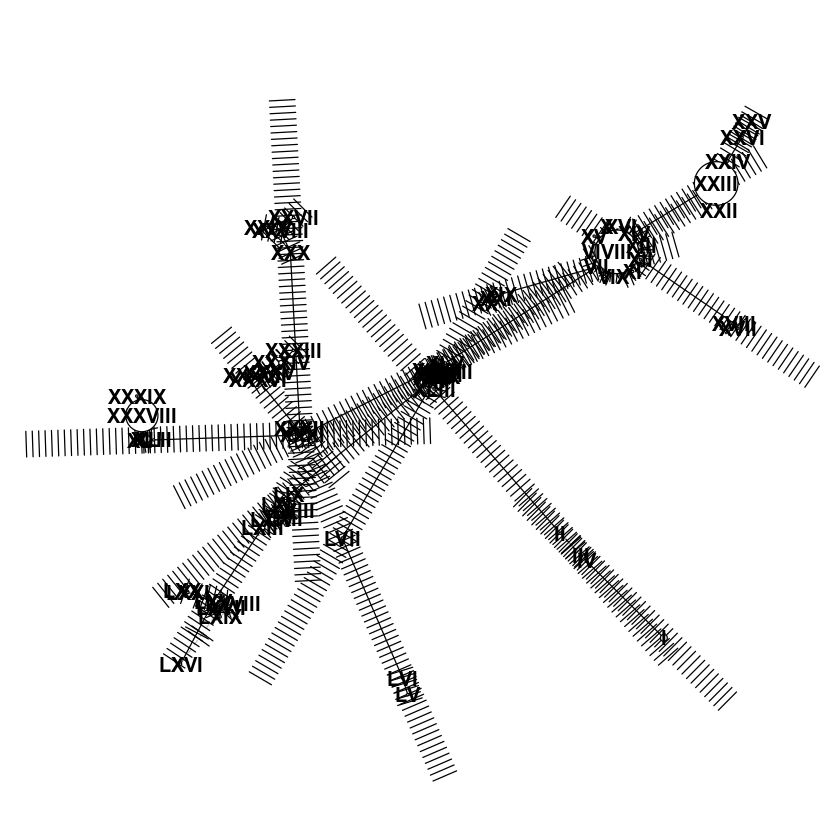

In [76]:
net <- pegas::haploNet(h, getProb = TRUE)
net
#print.default(net)
plot(net, size =attr(net, "freq"), cex=1, scale.ratio= fast = FALSE)

In [56]:
ind.hap<-with(
    stack(setNames(attr(h, "index"), rownames(h))),
    table(hap=ind, pop=rownames(d)[values])
)
mydata <- as.data.frame(ind.hap)
good <- mydata[mydata$Freq == 1,]
good
#ind.hap

,hap,pop,Freq
36,XXXVI,sp-NA|country-Egypt,1
37,XXXVII,sp-NA|country-Egypt,1
110,XXXIX,sp-NA|country-Kenya,1
111,XL,sp-NA|country-Kenya,1
180,XXXVIII,sp-NA|country-Senegal,1
327,XLIII,sp-Phlebotomus_alexandri|country-Algeria,1
328,XLIV,sp-Phlebotomus_alexandri|country-Algeria,1
329,XLV,sp-Phlebotomus_alexandri|country-Algeria,1
330,XLVI,sp-Phlebotomus_alexandri|country-Algeria,1
333,XLIX,sp-Phlebotomus_alexandri|country-Algeria,1


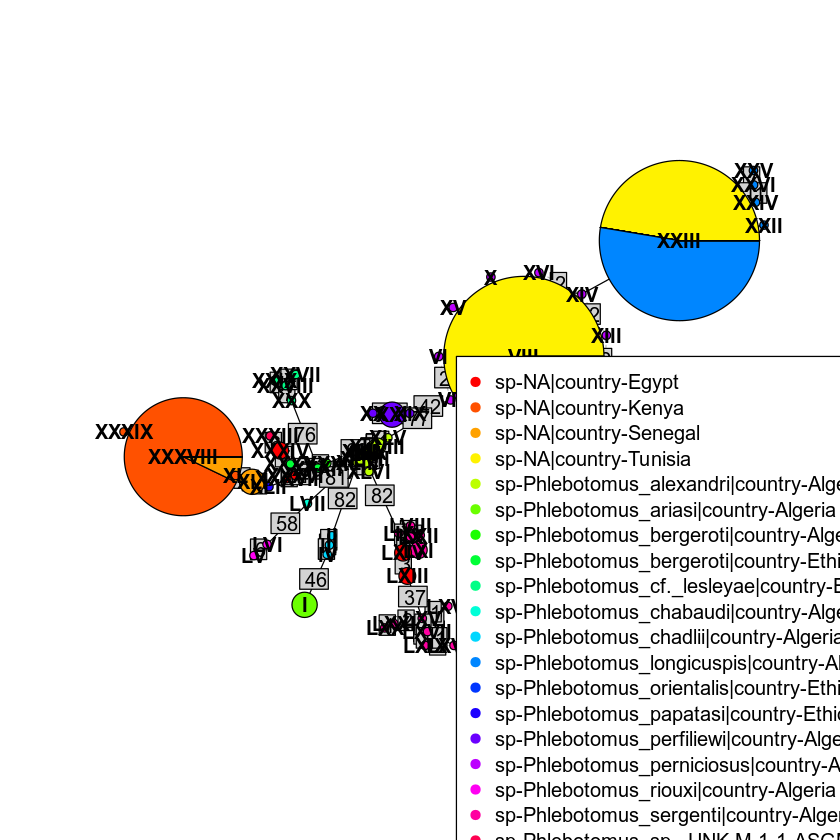

In [102]:
plot(net, size=attr(net, "freq"), scale.ratio=0.1, show.mutation=3, pie=ind.hap, fast=F)
legend(-8, 0, colnames(ind.hap), col=rainbow(ncol(ind.hap)), pch=19, ncol=1)

In [58]:
locations <- strsplit(as.character(good$pop),"|", fixed=T)
#locations[[1]]
species <- sapply(locations, "[[", 1)
#countries <- sapply(locations, "[[", 2)
#countries <- strsplit(as.character(countries), "-", fixed=T)
countries <- sapply((strsplit(as.character(sapply(locations, "[[", 2)), "-", fixed=T)), "[[", 2)
species[1:10]
countries[1:10]

[1] "sp-NA"                    "sp-NA"                   
 [3] "sp-NA"                    "sp-NA"                   
 [5] "sp-NA"                    "sp-Phlebotomus_alexandri"
 [7] "sp-Phlebotomus_alexandri" "sp-Phlebotomus_alexandri"
 [9] "sp-Phlebotomus_alexandri" "sp-Phlebotomus_alexandri"

[1] "Egypt"   "Egypt"   "Kenya"   "Kenya"   "Senegal" "Algeria" "Algeria"
 [8] "Algeria" "Algeria" "Algeria"

In [65]:
new_sp.hap <- table(good$hap, species)
new_country.hap <- table(good$hap, countries)
head(new_country.hap, 10)
head(new_sp.hap)

      countries
       Algeria Egypt Ethiopia Kenya Senegal
  I          0     0        0     0       0
  II         1     0        0     0       0
  III        1     0        0     0       0
  IV         1     0        0     0       0
  V          1     0        0     0       0
  VI         1     0        0     0       0
  VII        1     0        0     0       0
  VIII       0     0        0     0       0
  IX         1     0        0     0       0
  X          1     0        0     0       0

     species
      sp-NA sp-Phlebotomus_alexandri sp-Phlebotomus_bergeroti
  I       0                        0                        0
  II      0                        0                        0
  III     0                        0                        0
  IV      0                        0                        0
  V       0                        0                        0
  VI      0                        0                        0
     species
      sp-Phlebotomus_cf._lesleyae sp-Phlebotomus_chabaudi
  I                             0                       0
  II                            0                       0
  III                           0                       0
  IV                            0                       0
  V                             0                       0
  VI                            0                       0
     species
      sp-Phlebotomus_chadlii sp-Phlebotomus_longicuspis
  I                        0                          0
  II     

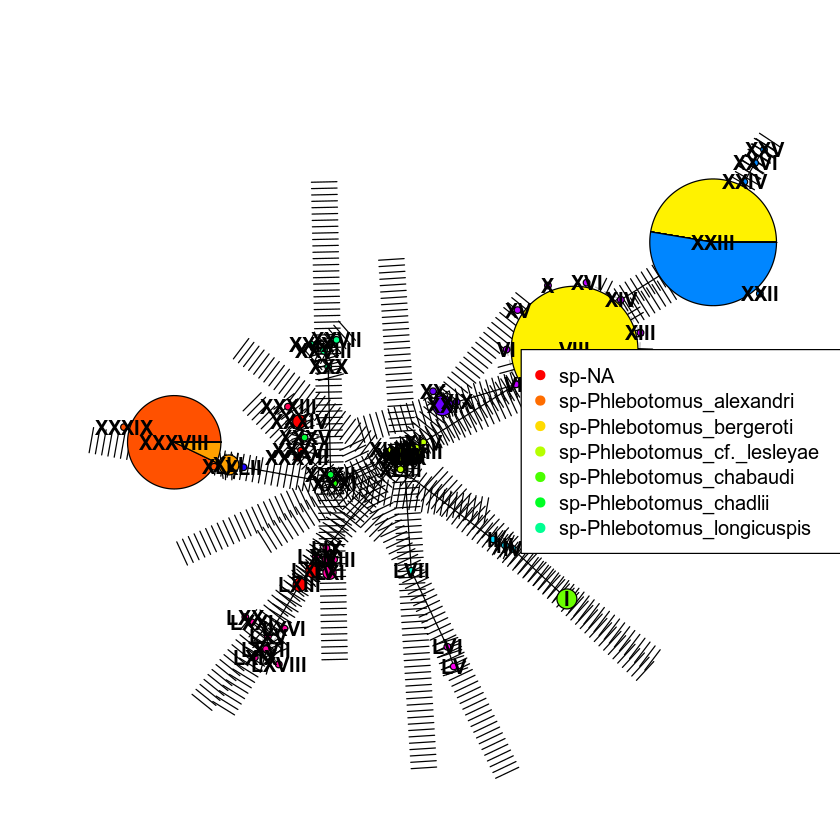

In [68]:
plot(net, size=attr(net, "freq"), scale.ratio=0.2, pie=ind.hap)
legend(-8, 0, colnames(new_sp.hap), col=rainbow(ncol(new_sp.hap)), pch=19, ncol=2)

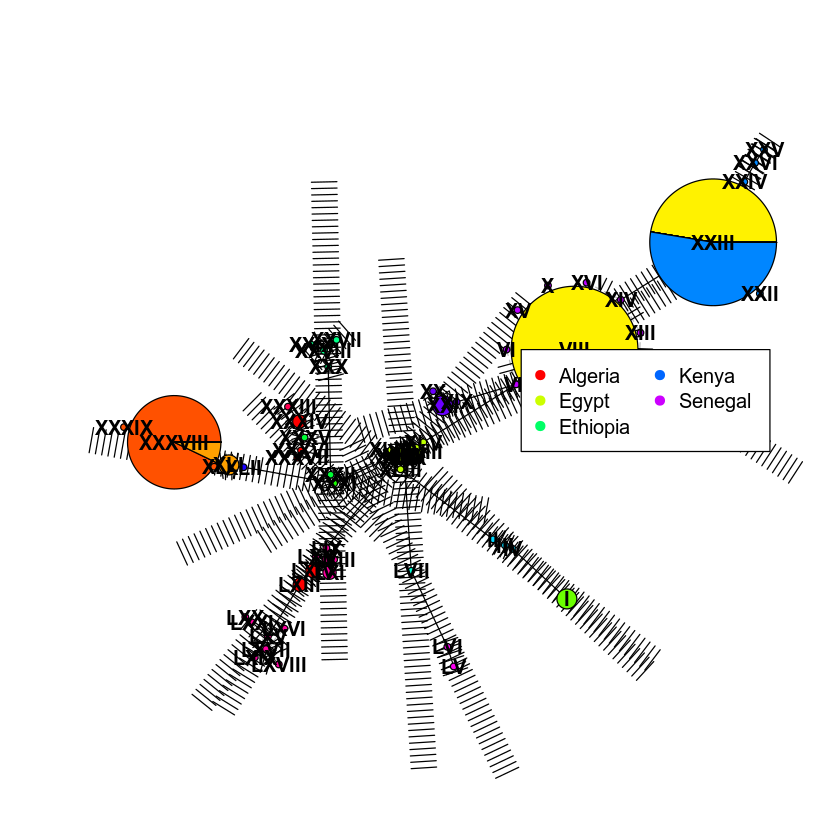

In [69]:
plot(net, size=attr(net, "freq"), scale.ratio=0.2, pie=ind.hap)
legend(-8, 0, colnames(new_country.hap), col=rainbow(ncol(new_country.hap)), pch=19, ncol=2)

In [97]:
?plot

plot {graphics},R Documentation
x,"the coordinates of points in the plot. Alternatively, a single plotting structure, function or any R object with a plot method can be provided."
y,"the y coordinates of points in the plot, optional if x is an appropriate structure."
...,"Arguments to be passed to methods, such as graphical parameters (see par). Many methods will accept the following arguments: typewhat type of plot should be drawn. Possible types are ""p"" for points, ""l"" for lines, ""b"" for both, ""c"" for the lines part alone of ""b"", ""o"" for both ‘overplotted’, ""h"" for ‘histogram’ like (or ‘high-density’) vertical lines, ""s"" for stair steps, ""S"" for other steps, see ‘Details’ below, ""n"" for no plotting. All other types give a warning or an error; using, e.g., type = ""punkte"" being equivalent to type = ""p"" for S compatibility. Note that some methods, e.g. plot.factor, do not accept this. mainan overall title for the plot: see title. suba sub title for the plot: see title. xlaba title for the x axis: see title. ylaba title for the y axis: see title. aspthe y/x aspect ratio, see plot.window."


In [110]:
getwd()
d.fas <- seqinr::read.fasta(input_fa)
#d.fas
write.nexus.data(d.fas, file="./d_fas.nexus", format="dna", interleaved=F)

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle"